In [7]:
import torch
from torch_geometric.data import Data
import os

data, _ = torch.load(r"/mnt/c/Users/Bruger/Desktop/Bachelor/GraphML_Bachelorprojekt/dataset/ogbn_mag/processed/geometric_data_processed.pt")


paper_data = data
print(paper_data)

/tmp/ipykernel_32224/1959629743.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data, _ = torch.load(r"/mnt/c/Users/Bruger/Desktop/Bachelor/GraphML_Bachelorprojekt/datas

Data(
  num_nodes_dict={
    author=1134649,
    field_of_study=59965,
    institution=8740,
    paper=736389,
  },
  edge_index_dict={
    (author, affiliated_with, institution)=[2, 1043998],
    (author, writes, paper)=[2, 7145660],
    (paper, cites, paper)=[2, 5416271],
    (paper, has_topic, field_of_study)=[2, 7505078],
  },
  x_dict={ paper=[736389, 128] },
  node_year={ paper=[736389, 1] },
  edge_reltype={
    (author, affiliated_with, institution)=[1043998, 1],
    (author, writes, paper)=[7145660, 1],
    (paper, cites, paper)=[5416271, 1],
    (paper, has_topic, field_of_study)=[7505078, 1],
  },
  y_dict={ paper=[736389, 1] }
)


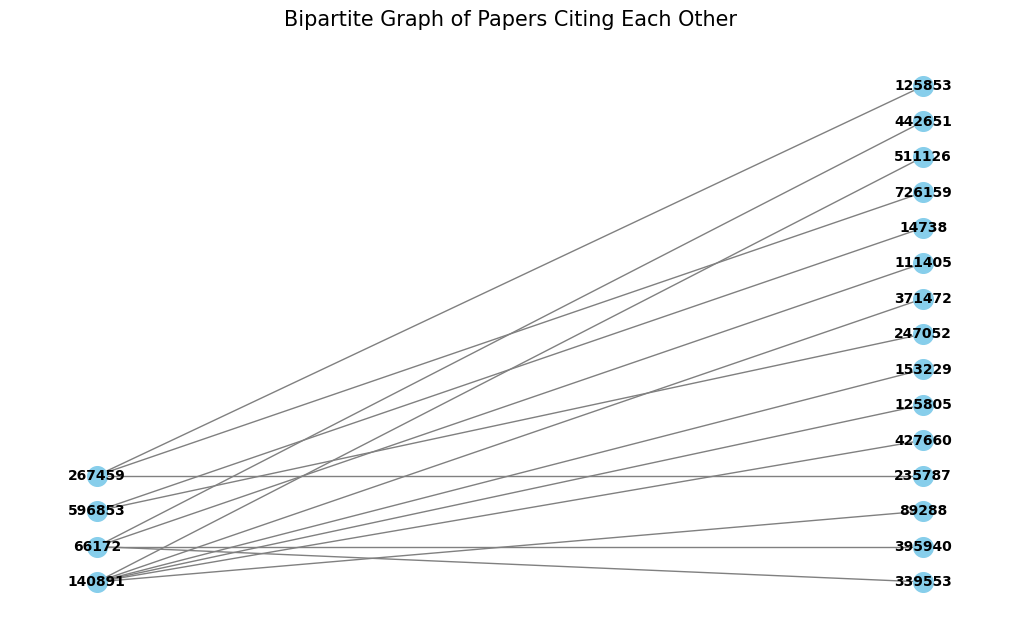

In [26]:
import torch
import random
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.data import Data

random.seed(1)

# Assuming data.edge_index_dict contains the edge indices for 'paper' citing 'paper' relationship
paper_cites_edge_index = data.edge_index_dict[('paper', 'cites', 'paper')]

# Step 1: Sample 10 random papers that cite each other
num_samples = 5
paper_ids = torch.unique(paper_cites_edge_index)  # Get all unique paper IDs

# Step 2: Select random pairs of papers that cite each other
random_papers = random.sample(list(paper_ids), num_samples)

# Step 3: Construct the bipartite graph
# We will consider two groups: one for citing papers and one for cited papers
citing_papers = []
cited_papers = []

# Find which papers cite which ones
for paper in random_papers:
    # Get all papers citing the current paper
    citations = (paper_cites_edge_index[0] == paper).nonzero(as_tuple=True)[0]
    
    # Append to citing and cited lists (citing paper -> cited paper)
    citing_papers.extend([paper] * len(citations))
    cited_papers.extend(paper_cites_edge_index[1][citations].tolist())

# Convert to tensors
citing_papers = torch.tensor(citing_papers)
cited_papers = torch.tensor(cited_papers)

# Step 4: Create the bipartite graph for PyG
edge_index = torch.stack([citing_papers, cited_papers], dim=0)

# Step 5: Visualize the graph using NetworkX and Matplotlib
G = nx.Graph()

# Add edges to the graph
for i in range(edge_index.shape[1]):
    G.add_edge(edge_index[0][i].item(), edge_index[1][i].item())

# Create a node set with two types: citing and cited papers
citing_paper_set = set(citing_papers.tolist())
cited_paper_set = set(cited_papers.tolist())

# Define a layout for the bipartite graph (two layers)
pos = {}
pos.update((node, (1, index)) for index, node in enumerate(citing_paper_set))  # Citing papers on the left
pos.update((node, (2, index)) for index, node in enumerate(cited_paper_set))   # Cited papers on the right


# Draw the graph
plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=200, font_size=10, font_weight='bold', edge_color='gray')

# Title and display
plt.title('Bipartite Graph of Papers Citing Each Other', size=15)
plt.show()

